Updated: 08/01/2024

This code is for visualising spherical / spheroidal harmonics on a sphere. 

In [1]:
import numpy as np
import qnmfitsrd as qnmfits
import spherical
import quaternionic
import matplotlib.pyplot as plt

l_max = 8
wigner = spherical.Wigner(l_max)

In [2]:

lon = np.linspace(-np.pi, np.pi, 200)
lat = np.linspace(-np.pi/2, np.pi/2, 200)

Lon, Lat = np.meshgrid(lon, lat)

def spherical(theta, phi):
    R = quaternionic.array.from_spherical_coordinates(theta, phi)
    Y = wigner.sYlm(-2, R)
    return Y 

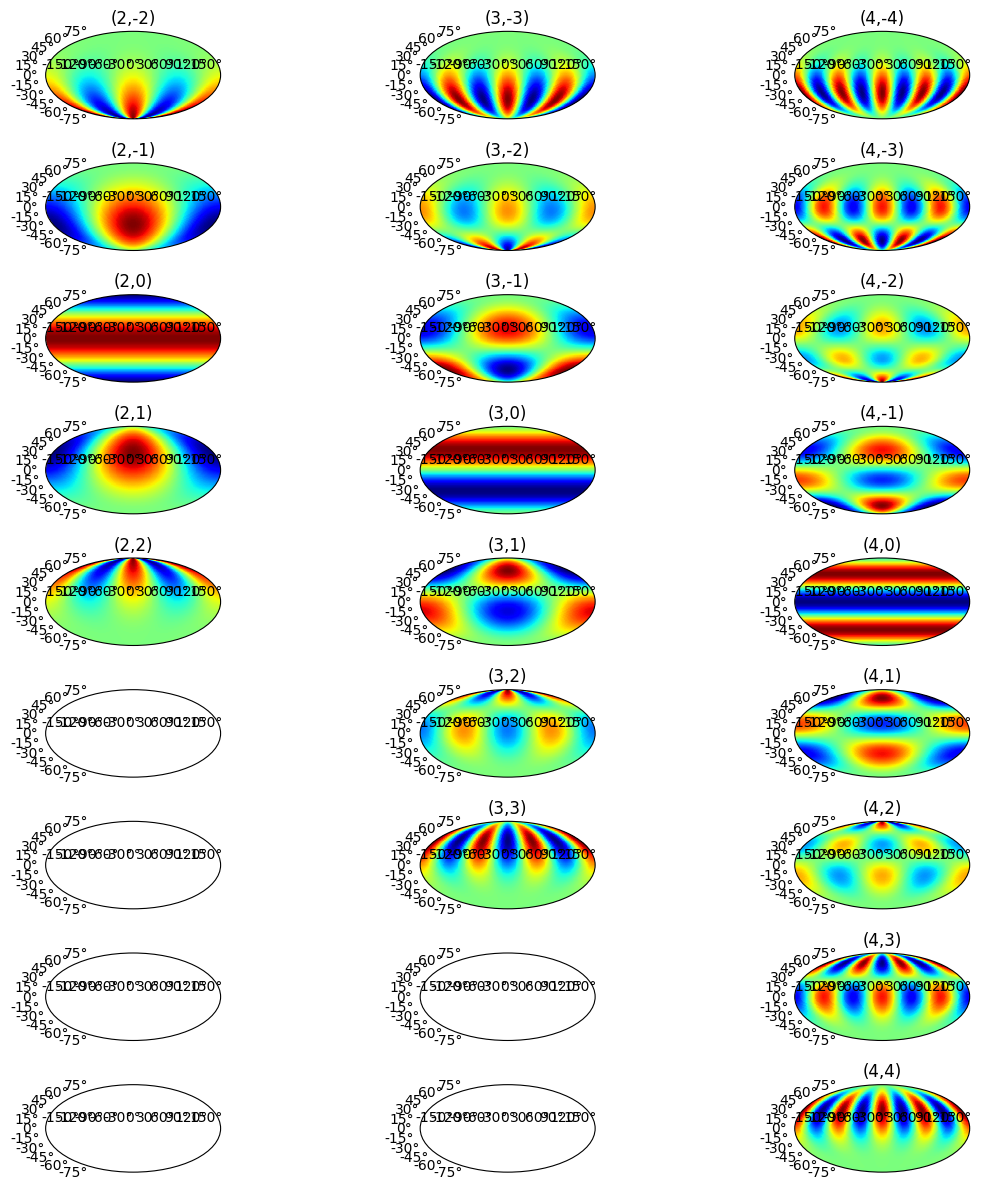

In [17]:
fig, axs = plt.subplots(nrows=9, ncols=3, 
                        subplot_kw={'projection': 'mollweide'}, 
                        figsize=(12, 12))

for l in range(2, 5):
    for m in range(-l, l+1):
        Y = spherical(np.pi/2-Lat, Lon)
        sph_mode = Y[:,:,wigner.Yindex(l, m)]
        sph_mode /= np.max(np.abs(sph_mode))
        ax = axs[m+l,l-2]
        ax.title.set_text(f"({l},{m})")
        ax.pcolormesh(Lon, Lat, np.real(sph_mode), cmap=plt.cm.jet)

plt.tight_layout()
plt.show()